In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))






,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


**Converting CSV file to Dataframe using Pandas**

In [ ]:
ab=pd.read_csv('/content/Default_Fin.csv')

**Using head() function to print first 5 rows to check the dataset**

In [ ]:
ab.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


**Checking for any null value**

In [ ]:
ab.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

*Note :that there is no null value to be removed.*

In [ ]:
col=["Index","Employed","Bank Balance","Annual Salary","Defaulted"]

*Note : Renaming the columns by providing suitable names*

In [ ]:
ab.columns=col
ab.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


**QUES 1: What is the number of people who would be given grace period for exactly 15 days?**

*For the grace period to be exactly 15 days: Employed==1 Annual Salary >1,00,000 Bank Balance > 5,000*

In [ ]:
ab[(ab["Defaulted"]==1) &(ab["Employed"]==1) & (ab["Annual Salary"]>100000.00) & (ab["Bank Balance"]>5000.00) ]

,Index,Employed,Bank Balance,Annual Salary,Defaulted
206,207,1,22675.20,587474.04,1
243,244,1,23573.76,468655.08,1
263,264,1,18364.20,360045.84,1
341,342,1,19713.84,562283.40,1
345,346,1,23899.80,505600.44,1
...,...,...,...,...,...
9893,9894,1,27460.92,624522.84,1
9912,9913,1,25786.80,531719.04,1
9949,9950,1,21003.00,618947.28,1
9951,9952,1,18187.32,584262.12,1


**Printing the exact number**

In [ ]:
ab[(ab["Defaulted"]==1) & (ab["Employed"]==1) & (ab["Annual Salary"]>100000.00) & (ab["Bank Balance"]>5000.00)]["Index"].count()

206

**QUES 2: Find the maximum amount that can be levied by bank in the period of 15 days**

*The defaulter who's not eligible for grace period and has maximum bank balance.*

In [ ]:
print(round(ab[(ab["Defaulted"]==1) & (ab["Annual Salary"]<100000.00) | (ab["Bank Balance"]<5000.00)]["Bank Balance"].max()*(25/1000),4))

124.989


**QUES 3: Assuming that all people falling in the category of defaulters have not paid their EMI in the grace period, what is the total amount being generated as a part of fine.**

*Defaulted? ==1*

*per day fine == 2.5% of bank balance*

In [ ]:
ab[(ab["Defaulted"]==1)]["Bank Balance"].sum()*(15*25/1000)

2619110.565

**QUES 4: Use a suitable plot to show the difference in bank balance of the people who are not eligible for a grace period, and those who are.**

*Note : To show the difference between eligible and non-eligible category, graph is being plotted. Eligible : Annual Salary>100000.0 and Bank Balance>5000.0 Non-Eligible : Annual Salary<100000.0 and Bank Balance<5000.0*

**1) Bar Graph**

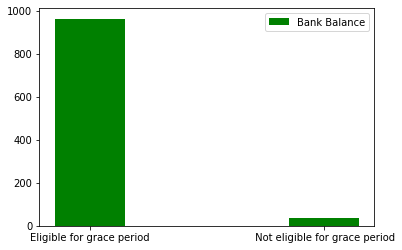

In [ ]:
# xx=[1,3]
xx=[1,2]
x=ab[(ab["Employed"]==0) | ((ab["Annual Salary"]>100000.00) & (ab["Bank Balance"]>5000.00))]["Bank Balance"].sum()/100000
y=ab[(ab["Employed"]==1) & ((ab["Annual Salary"]<100000.00) | (ab["Bank Balance"]<5000.00))]["Bank Balance"].sum()/100000
b=np.array([x,y])
plt.bar(xx,b,width=0.3,tick_label=["Eligible for grace period"," Not eligible for grace period"],label="Bank Balance",color="Green")
plt.legend()
plt.show()


**Scattering graph**

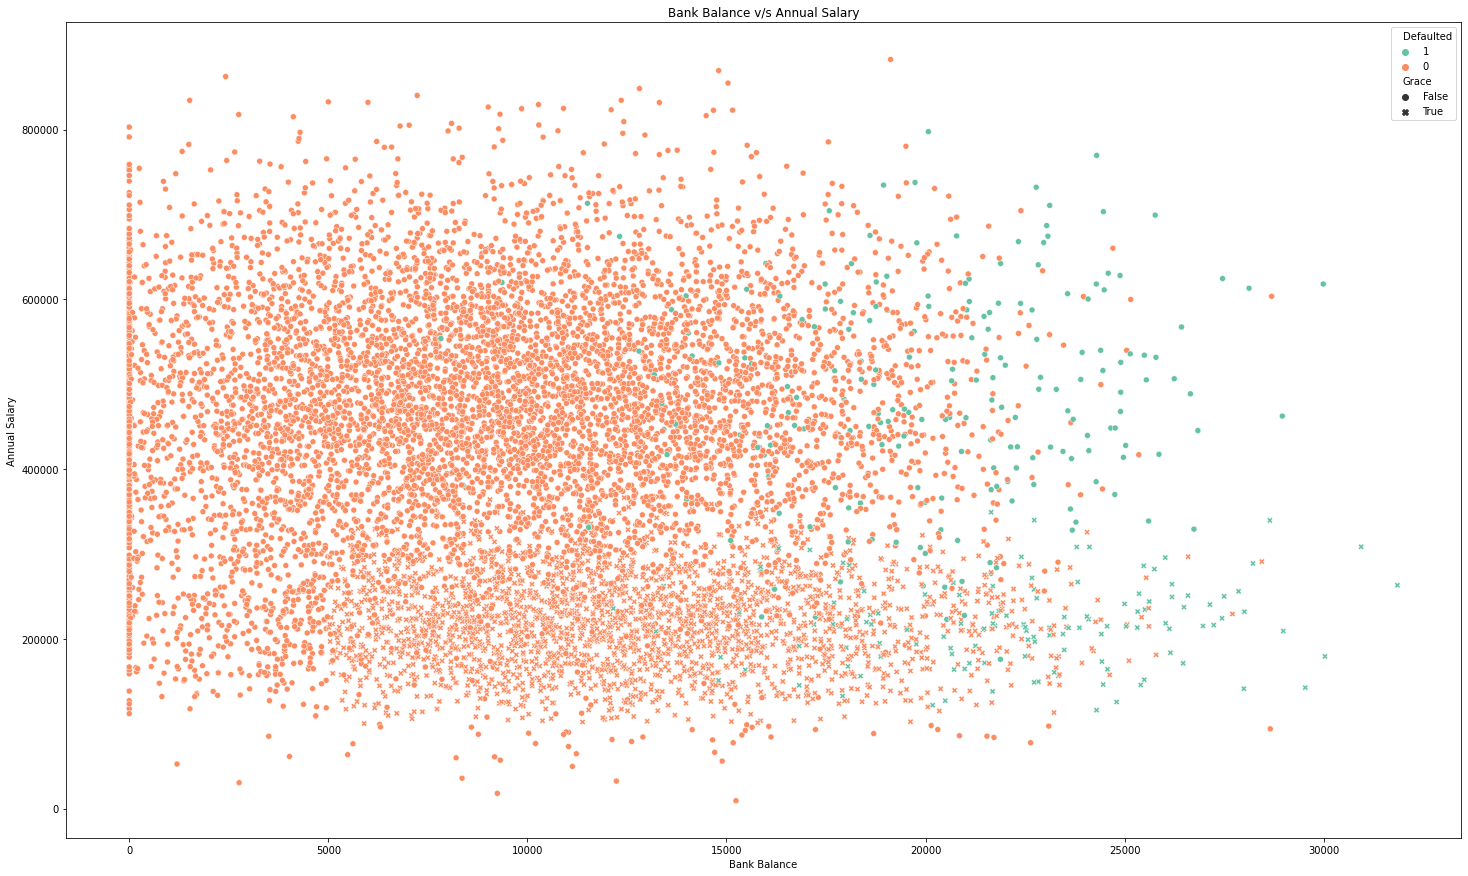

In [ ]:
ab['Grace']=(ab["Employed"]==0) & ((ab["Annual Salary"]>100000.00) & (ab["Bank Balance"]>5000.00))
plt.figure(figsize=(25,15))
sns.scatterplot(data=ab, x='Bank Balance', y='Annual Salary', hue='Defaulted', hue_order=[1,0], palette="Set2", style='Grace')
plt.title('Bank Balance v/s Annual Salary')
plt.show()

**QUES 5: Find the difference in the median of the bank balance of the people who are eligible for grace period and the original value.**

*Idea : Numpy has the median function which can be used to compute the median effectively.
Solution: The eligible people will be the ones earning annual salary greater than 100000 and having bank balance greater than 5000 or aren't employed*

In [ ]:
x=np.median(ab[(ab["Employed"]==0) | ((ab["Annual Salary"]>100000.00) & (ab["Bank Balance"]>5000.00))]["Bank Balance"])
y=np.median(ab["Bank Balance"])
print(round(abs(x-y),4))

1348.32


**QUES 6:Use the suitable graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.**

*The eligible people will be the ones earning annual salary greater than 100000 and having bank balance greater than 5000 or aren't employed
The non eligible people will be the employed ones whose salary is either lower than 100000 or bank balance is less than 5000*

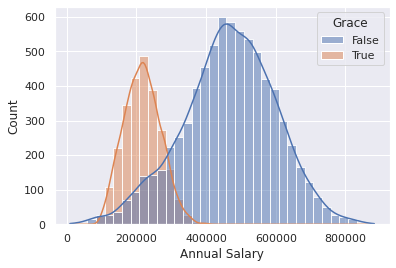

In [ ]:
sns.set()
sns.histplot(data=ab, x="Annual Salary", kde = True, hue = "Grace")
plt.show()